In [27]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in the data 
listings = pd.read_excel('./listings.xlsx', engine='openpyxl')

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [46]:
listings = pd.DataFrame()
for sheets in pd.ExcelFile('./listings.xlsx').sheet_names[1:]:
    sheet_df =  pd.read_excel('./listings.xlsx', sheet_name=sheets)
    sheet_df['Exchange'] = sheets
    listings = pd.concat([listings,sheet_df]).reset_index(drop=True)


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [47]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6314 entries, 0 to 6313
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6314 non-null   object 
 1   Company Name           6314 non-null   object 
 2   Last Sale              6244 non-null   float64
 3   Market Capitalization  6314 non-null   float64
 4   IPO Year               2747 non-null   float64
 5   Sector                 4944 non-null   object 
 6   Industry               4944 non-null   object 
 7   Exchange               6314 non-null   object 
dtypes: float64(3), object(5)
memory usage: 394.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, AAPL to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2304 non-null   object 
 1   Last Sale              2304 non-null   float64
 2  

In [52]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
(components.sort_values(ascending=False))

Sector                 Stock Symbol
Technology             AAPL            7.400245e+11
Consumer Services      AMZN            4.221385e+11
Miscellaneous          BABA            2.755250e+11
Health Care            AMGN            1.189272e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Energy                 PAA             2.222300e+10
Consumer Durables      CPRT            1.362092e+10
Name: Market Capitalization, dtype: float64

In [53]:


# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
(tickers)


Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [54]:

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
AAPL,Apple Inc.,7.400245e+11,141.05
AMZN,"Amazon.com, Inc.",4.221385e+11,884.67
BABA,Alibaba Group Holding Limited,2.755250e+11,110.21
AMGN,Amgen Inc.,1.189272e+11,161.61
UPS,"United Parcel Service, Inc.",9.018089e+10,103.74
GS,"Goldman Sachs Group, Inc. (The)",8.884059e+10,223.32
ABEV,Ambev S.A.,8.824020e+10,5.62
RIO,Rio Tinto Plc,7.043148e+10,38.94
TEF,Telefonica SA,5.460981e+10,10.84


Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


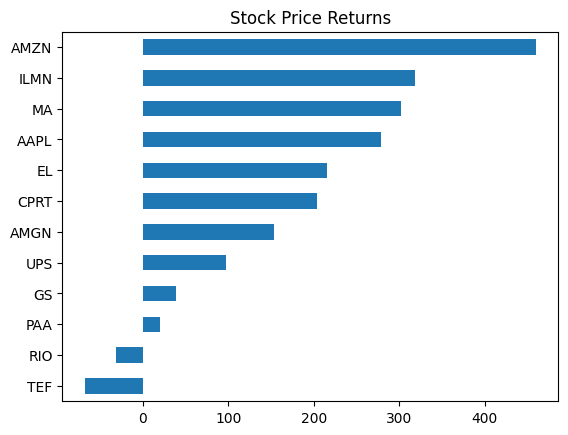

In [56]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('./stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

In [58]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, AAPL to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2304 non-null   object 
 1   Last Sale              2304 non-null   float64
 2   Market Capitalization  2304 non-null   float64
 3   IPO Year               2304 non-null   float64
 4   Sector                 2304 non-null   object 
 5   Industry               2304 non-null   object 
 6   Exchange               2304 non-null   object 
dtypes: float64(3), object(4)
memory usage: 208.5+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    7.043148e+10      38.94
GM                     5.008634e+10      33.39
CPRT                   1.362092e+10 

Stock Symbol
ABEV    1.570110e+10
AAPL    5.246540e+09
TEF     5.037805e+09
BABA    2.500000e+09
RIO     1.808718e+09
GM      1.500040e+09
UPS     8.692972e+08
AMGN    7.358902e+08
PAA     7.234050e+08
AMZN    4.771706e+08
CPRT    4.593903e+08
GS      3.978174e+08
dtype: float64

Stock Symbol
GS      3.978174e+08
CPRT    4.593903e+08
AMZN    4.771706e+08
PAA     7.234050e+08
AMGN    7.358902e+08
UPS     8.692972e+08
GM      1.500040e+09
RIO     1.808718e+09
BABA    2.500000e+09
TEF     5.037805e+09
AAPL    5.246540e+09
ABEV    1.570110e+10
Name: Number of Shares, dtype: float64


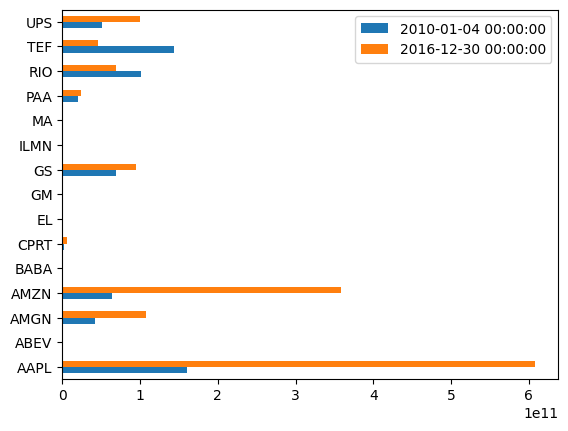

In [63]:
# Select the number of shares
components['Number of Shares'] = components['Market Capitalization'].div(components['Last Sale'])
no_shares = components['Number of Shares']
print(no_shares.sort_values(ascending=True))

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946857e+05
2010-01-07    6.912416e+05
2010-01-08    6.958476e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574862e+06
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64


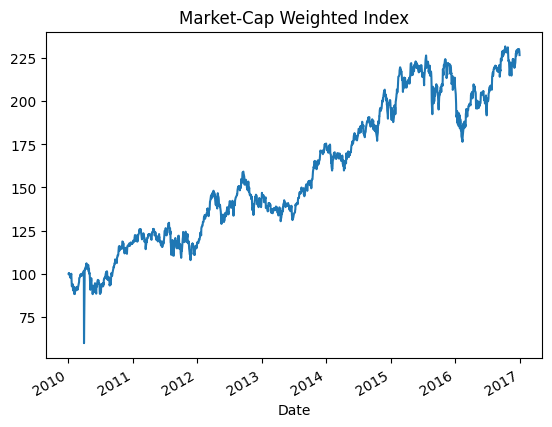

In [67]:
# Aggregate and print the market cap per trading day
market_cap_series = pd.read_csv('./market_cap_series.csv', parse_dates=['Date'], index_col='Date')
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

126.65826661173818
Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


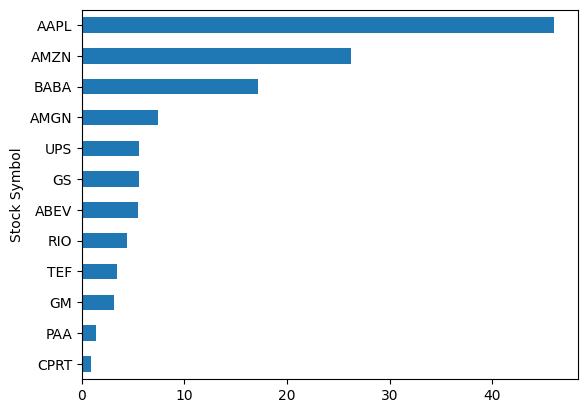

In [68]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

126.65826661173818
Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


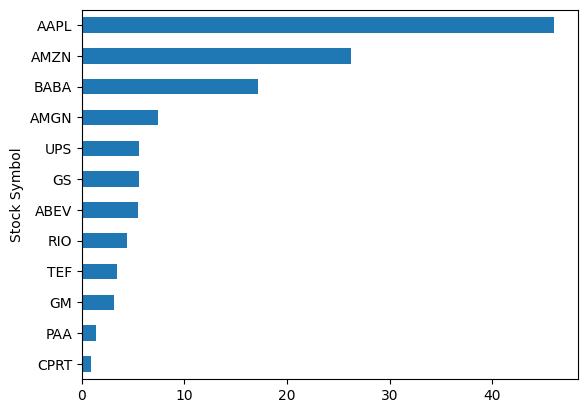

In [69]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

Index    126.658267
DJIA      86.722172
dtype: float64


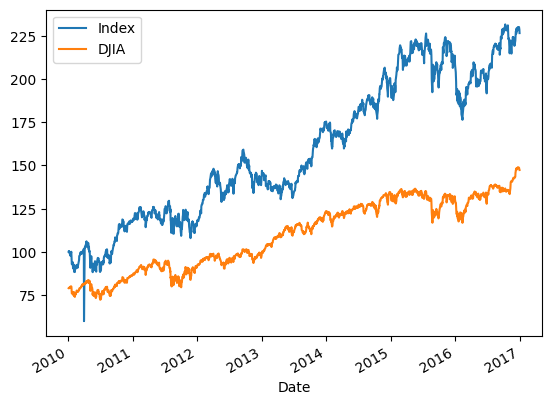

In [71]:
# Convert index series to dataframe here
data = index.to_frame('Index')
djia = pd.read_csv('./djia.csv', parse_dates=['date'], index_col='date')
# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.457394  78.844952
2010-01-06   99.981005  78.857332
2010-01-07   99.485328  79.104785
2010-01-08  100.148231  79.189283


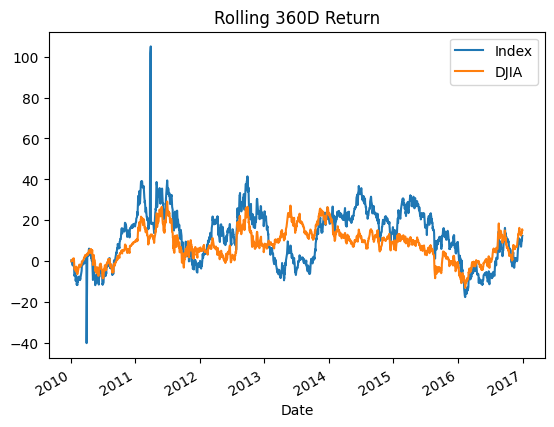

In [72]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_14172\4000232535.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_prices.pct_change()


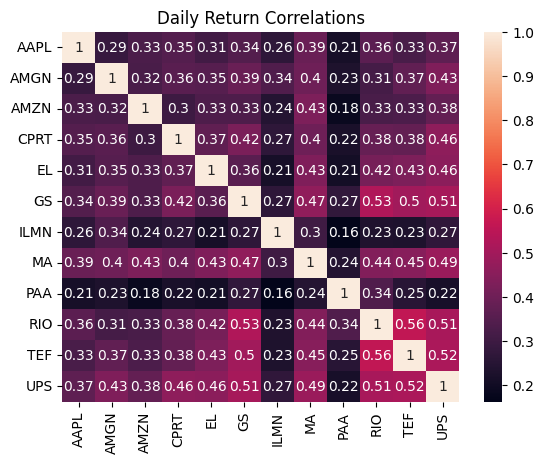

In [74]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

import seaborn as sns
# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

In [76]:
index

Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64

In [80]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())
stock_prices['index'] = index
# Join index to stock_prices, and inspect the result
data = stock_prices
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xlsx') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')

<class 'pandas.core.series.Series'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  index   1762 non-null   float64
dtypes: float64(13)
memory usage: 192.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Datetime

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_14172\2166942654.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change()
